## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 7 : NB & SVM </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [3]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = ""

In [4]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		
Start: 		2023-10-17 20:06:45.440971
Device ID: 	060a64ff-6cee-11ee-a38c-c7d6d36205c6



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset1]
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing system library

In [5]:
import sys

#### Importing numpy library

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

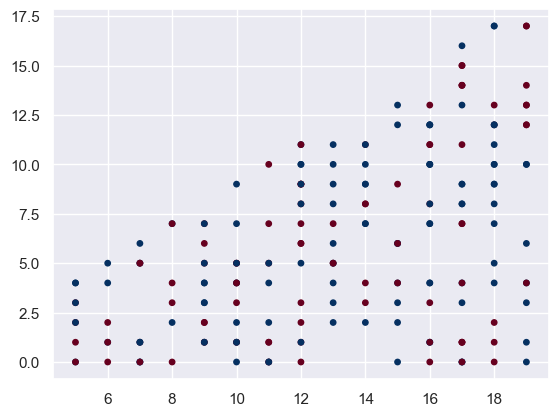

In [49]:
# Generate gaussian Naive Bayes
df = pd.read_csv("./train.csv")
X = df[['sc_h', 'sc_w']].iloc[:200].values
y = df['four_g'].iloc[:200].values
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdBu');

array([False,  True,  True, False,  True, False,  True, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True,

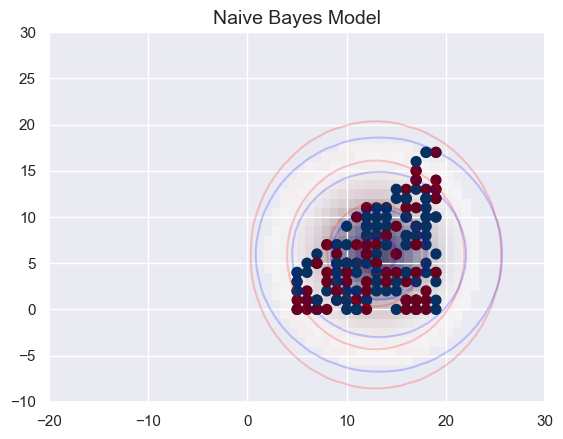

In [53]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = ( -20, 30)
ylim = (-10, 30)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5, cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape), levels=[0.01, 0.1, 0.5, 0.9], colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

mask

In [54]:
# Implement Gaussian with Scikit-Learn's :
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [55]:
df_test = pd.read_csv('./test.csv')
Xnew = df_test[['clock_speed', 'four_g']].values
ynew = model.predict(Xnew)

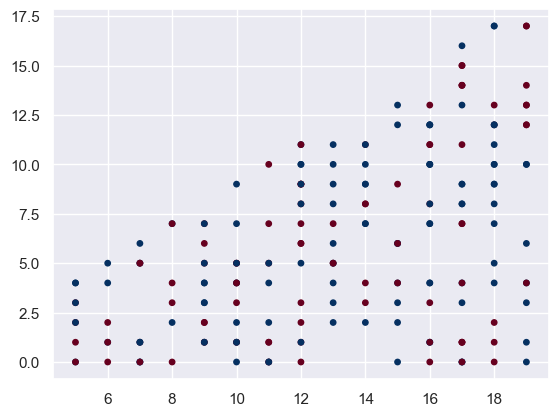

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu')
plt.axis(lim);

In [57]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.55, 0.45],
       [0.53, 0.47],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.57, 0.43],
       [0.55, 0.45]])

In [58]:
# Multinomial Naive Bayes
print(df.describe)
print(df_test.describe)

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [59]:
train = pd.read_csv('./twt/Corona_NLP_train.csv', encoding='ISO-8859-1')
htrain = train.columns
train = train.iloc[:3798,5:6].values
ftrain = np.ravel(train)
strain = str(ftrain)
test = pd.read_csv('./twt/Corona_NLP_test.csv', encoding='ISO-8859-1')
test = test.iloc[:,5:6].values
ftest = np.ravel(test)
stest = str(ftest)

In [60]:
print(ftrain[5])

Positive


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [62]:
model.fit(ftrain, ftrain)
labels = model.predict(ftest)
labels

array(['Extremely Negative', 'Positive', 'Extremely Positive', ...,
       'Neutral', 'Extremely Negative', 'Extremely Positive'],
      dtype='<U18')

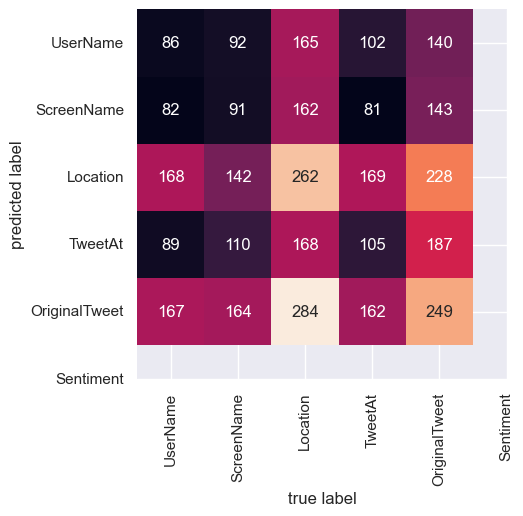

In [63]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ftest, ftrain)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=htrain, yticklabels=htrain)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [65]:
def predict_category(s, train=ftrain, model=model):
    pred = model.predict([s])
    return pred
  
predict_category('Coronavirus Australia')

array(['Positive'], dtype='<U18')

In [66]:
predict_category('discussing islam vs atheism')

array(['Positive'], dtype='<U18')

In [67]:
predict_category('determining the screen resolution')

array(['Positive'], dtype='<U18')

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

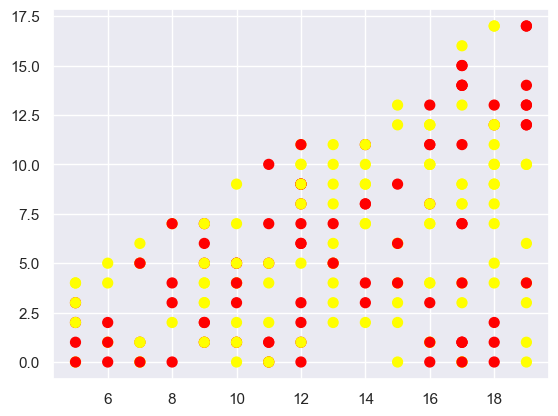

In [69]:
X = df[['sc_h', 'sc_w']].iloc[:200].values
y = df['four_g'].iloc[:200].values

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

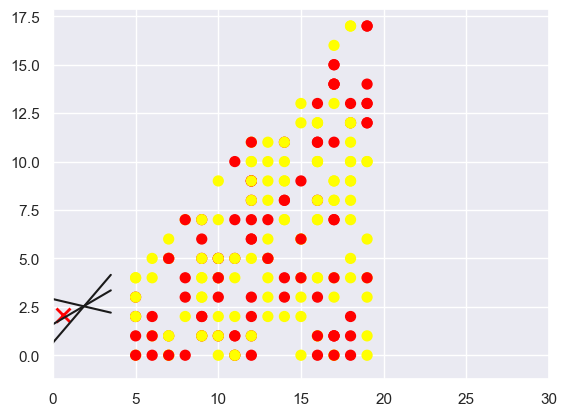

In [70]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(0, 30);

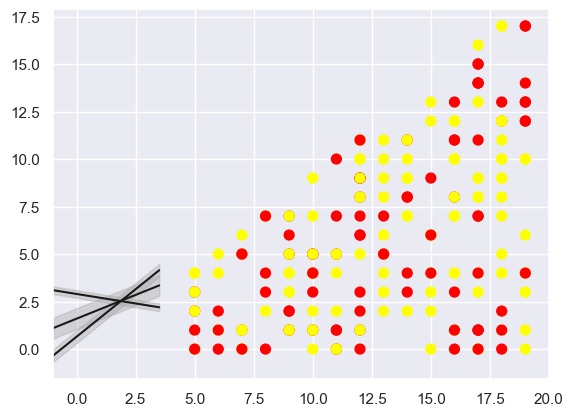

In [71]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 20);

In [72]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E4)
model.fit(X, y)

SVC(C=10000.0, kernel='linear')

In [73]:
def plot_svc_decisioon_function(model, ax=None, plot_support= True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X,Y,P, colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--','-','--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

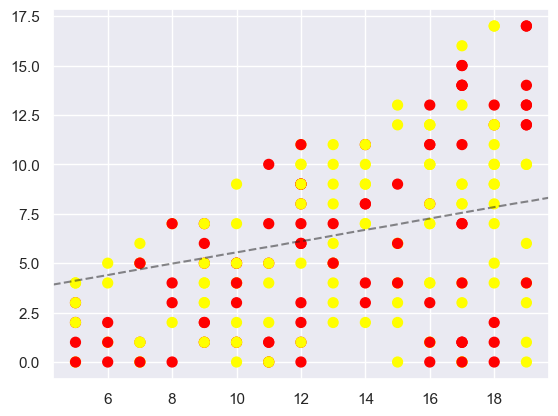

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decisioon_function(model);

In [75]:
model.support_vectors_

array([[ 9.,  7.],
       [16.,  8.],
       [17.,  1.],
       [16.,  3.],
       [17.,  1.],
       [ 5.,  2.],
       [18.,  0.],
       [ 7.,  1.],
       [17., 15.],
       [19., 13.],
       [11.,  1.],
       [17., 15.],
       [17.,  1.],
       [11.,  5.],
       [12.,  7.],
       [17., 11.],
       [ 5.,  1.],
       [12.,  1.],
       [10.,  4.],
       [13.,  7.],
       [18., 12.],
       [18.,  2.],
       [ 8.,  3.],
       [10.,  5.],
       [16., 13.],
       [19., 12.],
       [ 6.,  0.],
       [14., 11.],
       [ 7.,  5.],
       [14.,  4.],
       [16., 11.],
       [11.,  1.],
       [11.,  0.],
       [ 9.,  2.],
       [11.,  7.],
       [ 8.,  7.],
       [ 9.,  6.],
       [10.,  3.],
       [15.,  9.],
       [16.,  0.],
       [ 9.,  5.],
       [10.,  1.],
       [19., 17.],
       [13.,  5.],
       [14.,  3.],
       [ 6.,  2.],
       [17., 14.],
       [12.,  6.],
       [18.,  1.],
       [19., 17.],
       [19., 13.],
       [18., 13.],
       [ 8.,

In [ ]:
def plot_svm(N=10, ax=None):
    
    X = df[['sc_h', 'sc_w']].iloc[:50].values
    y = df['four_g'].iloc[:50].values
    
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decisioon_function(model, ax)

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,120]):
    plot_svm(N, axi)
    axi.set_title('N={0}'.format(N))

In [76]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

# interact(plot_svm, N=[10,200], ax=fixed(None));

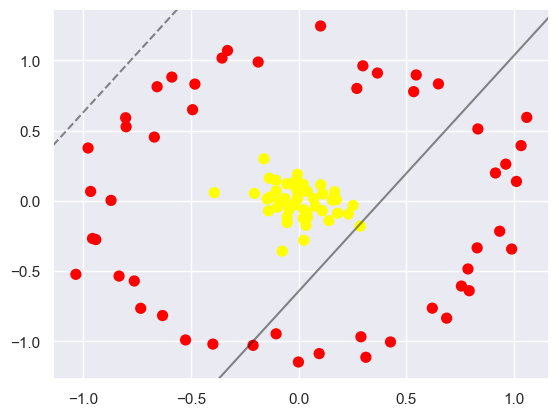

In [77]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decisioon_function(clf, plot_support=False);

In [78]:
r = np.exp(-(X**2).sum(1))

In [79]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
  
interact(plot_3D, elev=[-90,90], azip=(-180,180),
        X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [80]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0)

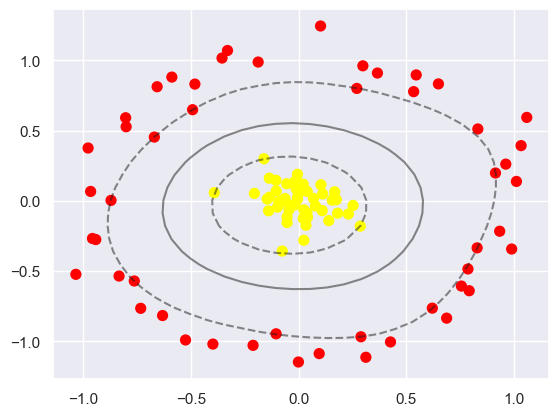

In [81]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decisioon_function(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
           s=300, lw=1, facecolors='none');

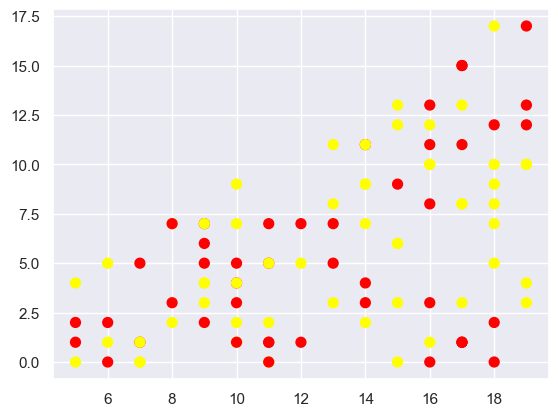

In [83]:
X = df[['sc_h', 'sc_w']].iloc[:100].values
y = df['four_g'].iloc[:100].values
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn');

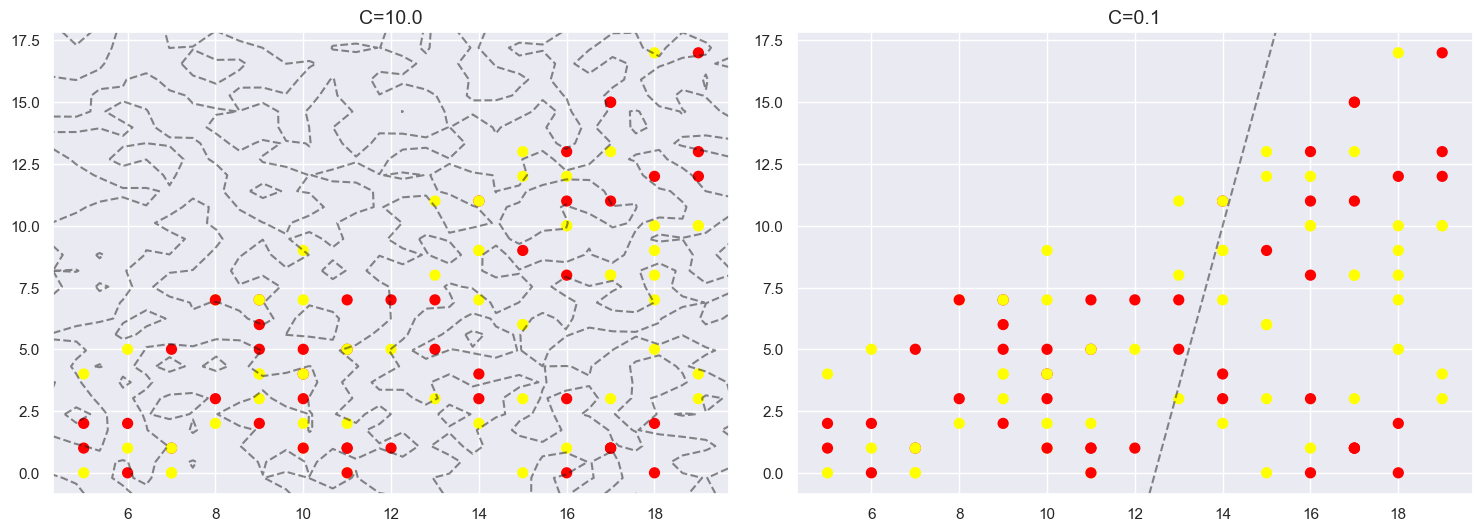

In [85]:
X = df[['sc_h', 'sc_w']].iloc[:100].values
y = df['four_g'].iloc[:100].values

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    plot_svc_decisioon_function(model, axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, lw=1, facecolors='none');
    axi.set_title('C={0:.1f}'.format(C), size=14)

In [38]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


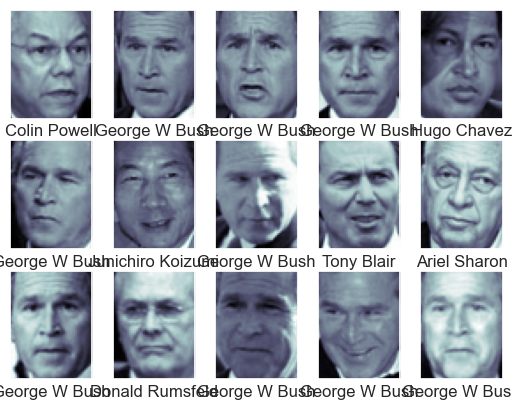

In [39]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [40]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                               random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 27s
Wall time: 19.2 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [43]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

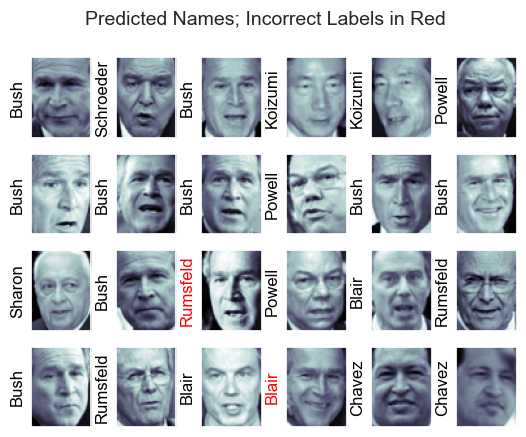

In [44]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                           target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



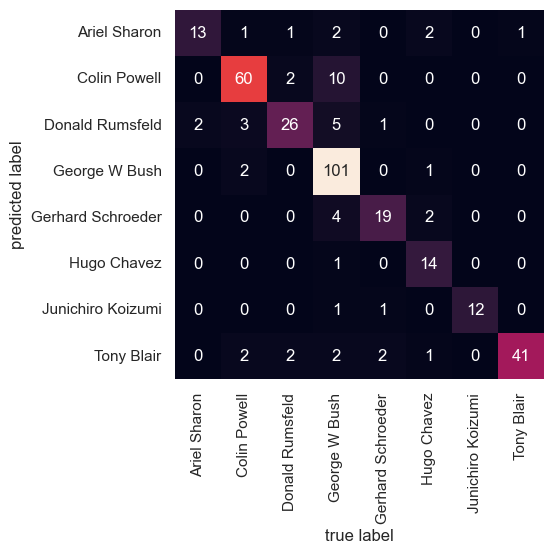

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Time-stamp:	2023-10-17 18:59:31.014207


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Perbedaan dataset hanya terjadi pada jumlah row saja
    - Penggunaan NB sangat cocok untuk melakukan klasisfikasi pada sentimen, sedangkan SVM dapat membedakan beberapa fitur dengan garis pemisah

---

***

### Save the notebook, then convert the notebook to html (by running the next code).

In [86]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_07_58511_RagilMuhamadRamadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_07_58511_RagilMuhamadRamadhan.ipynb to html
[NbConvertApp] Writing 2267307 bytes to IF540_EL_Laporan_07_58511_RagilMuhamadRamadhan.html
